# Create an Animated GIF Using Python Matplotlib

https://www.c-sharpcorner.com/article/create-animated-gif-using-python-matplotlib/


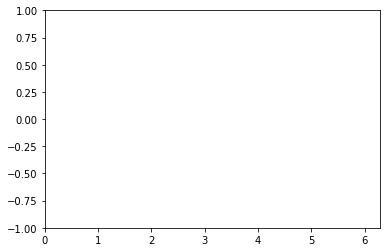

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation, PillowWriter  

fig, ax = plt.subplots()  
x, ysin, ycos = [], [], []  
ln1, = plt.plot([], [], 'ro')  
ln2, = plt.plot([], [], 'm*')  

def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)  
  
def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ycos.append(np.cos(i))  
    ln1.set_data(x, ysin)  
    ln2.set_data(x, ycos)

ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
plt.show()    

writer = PillowWriter(fps=25)  
ani.save("demo_sine.gif", writer=writer) 

MCS 507: Mathematical, Statistical and Scientific Software Fall 2019

http://homepages.math.uic.edu/~jan/mcs507/index.html

http://homepages.math.uic.edu/~jan/



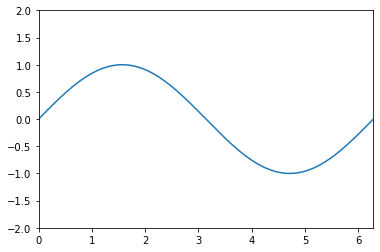

In [ ]:
from pylab import arange, sin, pi
from pylab import plot, axis, show

X = arange(0, 2*pi, 0.01)
Y = sin(X)
plot(X, Y)
axis([0, 2*pi, -2, 2])
show()

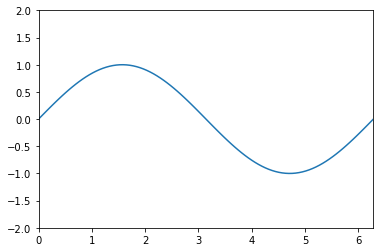

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from numpy import linspace, sin, pi

X = linspace(0.0, 2*pi, 100)
Y = sin(X)
plt.plot(X, Y)
plt.axis([0, 2*pi, -2, 2])
# plt.show()
plt.savefig('pyplotsinplot.png')

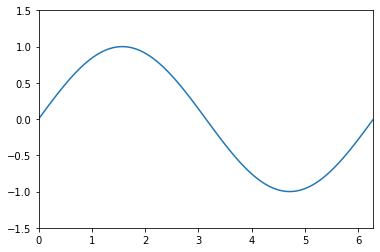

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter 

def animate(freq):
    """
    Makes a plot of the sine function
    for the given frequence in freq.
    """
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin((freq+1)*x) # first call is with 0
    plt.clf() # clears the current plot
    axs = plt.axes(xlim=(0, 2*np.pi), ylim=(-1.5, 1.5))
    plt.plot(x, y)

fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=5)

writer = PillowWriter(fps=25) 
anim.save('animatedsine.gif', writer=writer)

plt.show()

# Simple animation examples

https://matplotlib.org/gallery/animation/basic_example.html

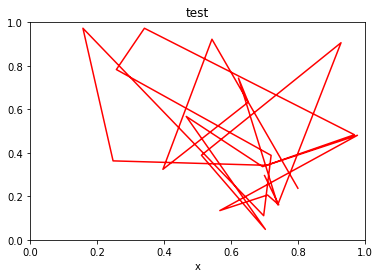

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
     
line_ani.save('lines.mp4')

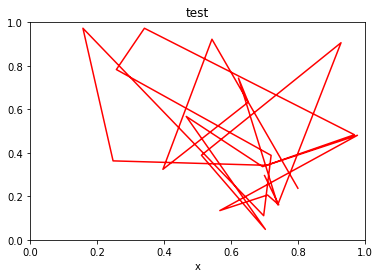

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

writer = PillowWriter(fps=25) 
line_ani.save('lines.gif', writer=writer)

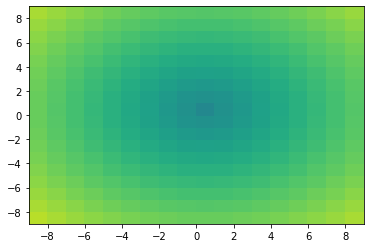

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})
im_ani.save('im.mp4', metadata={'artist':'Guido'})
plt.show()

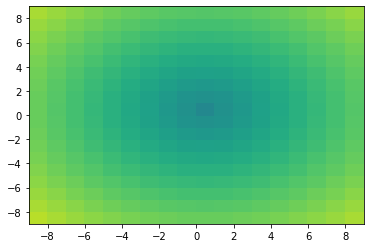

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
writer = PillowWriter(fps=25) 
im_ani .save('im.gif', writer=writer)

# Drawing animated GIFs with matplotlib

https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/

fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 0


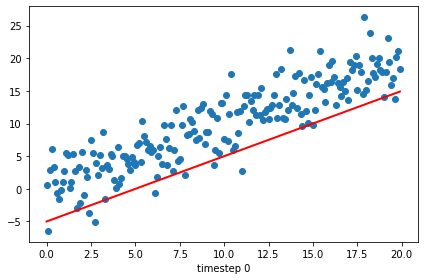

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
writer = PillowWriter(fps=25) 
anim.save('lineanim.gif', dpi=80, writer=writer)
plt.show()

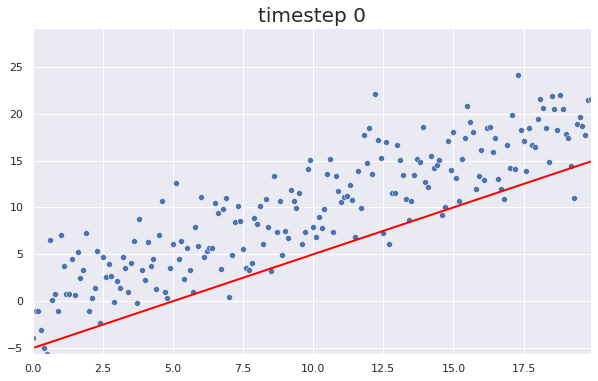

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter

x = np.arange(0, 20, 0.1)
y = x + np.random.normal(0, 3.0, len(x))

fig = plt.figure(figsize=(10,6))
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)


x = np.arange(0, 20, 0.1)
y = x + np.random.normal(0, 3.0, len(x))

def animate(i):
    plt.cla()
    title = 'timestep {0}'.format(i)
    plt.xlim(np.min(x), np.max(x))
    plt.ylim(np.min(y), np.max(y)+5)  
    sns.set_theme(style="darkgrid")
    sns.scatterplot(x = x,y = y)
    sns.lineplot(x = x, y = x - 5+ i, color='red', linewidth=2)
    plt.title(title,fontsize=20)

anim = FuncAnimation(fig, animate, frames=np.arange(0, 10), interval=200)
writer = PillowWriter(fps=25) 
anim.save('lineanimsns.gif', dpi=80, writer=writer)






# How to Create Animated Graphs in Python

https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1

In [ ]:
!wget https://www.drugabuse.gov/sites/default/files/overdose_data_1999-2015.xls

--2020-11-20 03:09:38--  https://www.drugabuse.gov/sites/default/files/overdose_data_1999-2015.xls
Resolving www.drugabuse.gov (www.drugabuse.gov)... 54.201.240.84, 2406:da00:ff00::22e0:3ba7, 2406:da00:ff00::34ca:79a3
Connecting to www.drugabuse.gov (www.drugabuse.gov)|54.201.240.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 340480 (332K) [application/vnd.ms-excel]
Saving to: ‘overdose_data_1999-2015.xls’

overdose_data_1999- 100%[===================>] 332.50K   638KB/s    in 0.5s    

2020-11-20 03:09:39 (638 KB/s) - ‘overdose_data_1999-2015.xls’ saved [340480/340480]



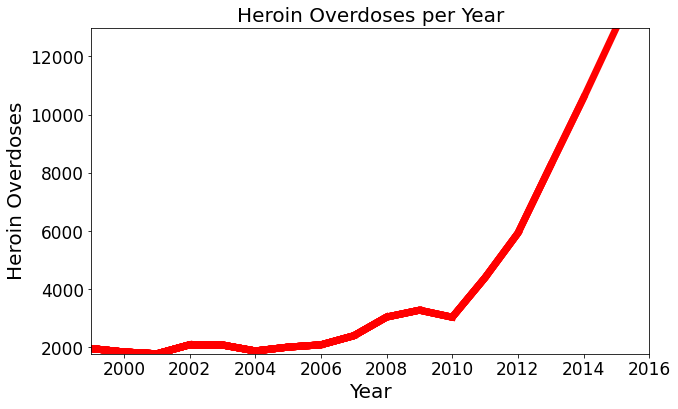

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

overdoses = pd.read_excel('overdose_data_1999-2015.xls', skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}


fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
writer = PillowWriter(fps=25) 
ani.save('HeroinOverdosesJumpy.gif', writer=writer)

# Redrawing Seaborn Figures for Animations

https://stackoverflow.com/questions/46236902/redrawing-seaborn-figures-for-animations

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1556: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


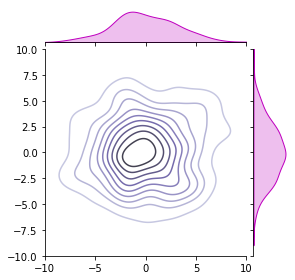

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np

def get_data(i=0):
    x,y = np.random.normal(loc=i,scale=3,size=(2, 260))
    return x,y

x,y = get_data()
g = sns.JointGrid(x=x, y=y, size=4)
lim = (-10,10)

def prep_axes(g, xlim, ylim):
    g.ax_joint.clear()
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_marg_x.clear()
    g.ax_marg_x.set_xlim(xlim)
    g.ax_marg_y.clear()
    g.ax_marg_y.set_ylim(ylim)
    plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)


def animate(i):
    g.x, g.y = get_data(i)
    prep_axes(g, lim, lim)
    g.plot_joint(sns.kdeplot, cmap="Purples_d")
    g.plot_marginals(sns.kdeplot, color="m", shade=True)

frames=np.sin(np.linspace(0,2*np.pi,17))*5

ani = matplotlib.animation.FuncAnimation(g.fig, animate, frames=frames, repeat=True)

writer = matplotlib.animation.PillowWriter(fps=25)
ani.save('contourns.gif', dpi=80, writer=writer) 

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1556: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


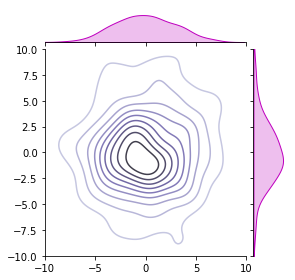

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np

def get_data(i=0):
    x,y = np.random.normal(loc=i,scale=3,size=(2, 260))
    return x,y

x,y = get_data()
g = sns.JointGrid(x=x, y=y, size=4)
lim = (-10,10)

def prep_axes(g, xlim, ylim):
    g.ax_joint.clear()
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_marg_x.clear()
    g.ax_marg_x.set_xlim(xlim)
    g.ax_marg_y.clear()
    g.ax_marg_y.set_ylim(ylim)
    plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)


def animate(i):
    g.x, g.y = get_data(i)
    prep_axes(g, lim, lim)
    g.plot_joint(sns.kdeplot, cmap="Purples_d")
    g.plot_marginals(sns.kdeplot, color="m", shade=True)

frames=np.sin(np.linspace(0,2*np.pi,17))*5
ani = matplotlib.animation.FuncAnimation(g.fig, animate, frames=frames, repeat=True)
from IPython.display import HTML
ani.save('contourns.mp4', writer='ffmpeg', fps=20);
HTML(ani.to_jshtml())

# Celluloid Easy Matplotlib/Seaborn Animation

https://pypi.org/project/celluloid/



Convert MP4/AVI clips to GIF with a single Python function 
https://gist.github.com/michaelosthege/cd3e0c3c556b70a79deba6855deb2cc8

In [ ]:
!pip install celluloid

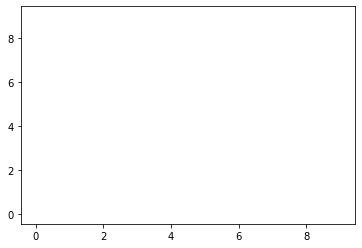

In [ ]:
from matplotlib import pyplot as plt
from celluloid import Camera
import imageio 

fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
animation = camera.animate()
animation.save('lineanimation.mp4')

reader = imageio.get_reader('lineanimation.mp4')
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('lineanimation.gif', fps=fps)
for i,im in enumerate(reader):
        writer.append_data(im)
writer.close()

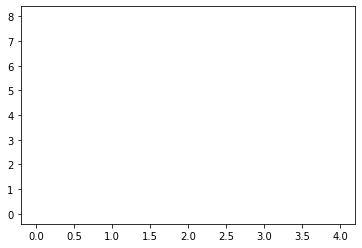

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
import imageio 

fig = plt.figure()
camera = Camera(fig)
for i in range(5):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
animation = camera.animate()
animation.save('labelsnimation.mp4')

reader = imageio.get_reader('labelsnimation.mp4')
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('labelsnimation.gif', fps=fps)
for i,im in enumerate(reader):
        writer.append_data(im)
writer.close()

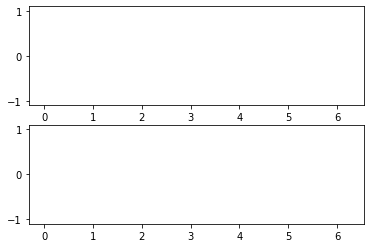

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera
import imageio 

fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue')
    axes[1].plot(t, np.sin(t - i), color='blue')
    camera.snap()
animation = camera.animate()
animation.save('sineanimation.mp4')

reader = imageio.get_reader('sineanimation.mp4')
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('sineanimation.gif', fps=fps)
for i,im in enumerate(reader):
        writer.append_data(im)
writer.close()

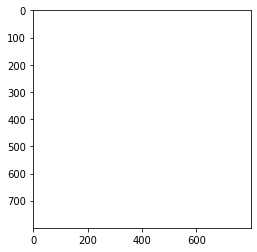

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import hsv_to_rgb
from IPython.display import Image
import imageio 

#from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

for a in range(2): #np.linspace(0, 2 * np.pi, 30, endpoint=False):
    x = np.linspace(-3, 3, 800)
    X, Y = np.meshgrid(x, x)
    x = X + 1j * Y
    y = (x ** 2 - 2.5) * (x - 2.5 * 1j) * (x + 2.5 * 1j) \
        * (x - 2 - 1j) ** 2 / ((x - np.exp(1j * a)) ** 2
        * (x - np.exp(1j * 2 * a)) ** 2)

    H = np.angle(y) / (2 * np.pi) + .5
    r = np.log2(1. + np.abs(y))
    S = (1. + np.abs(np.sin(2. * np.pi * r))) / 2.
    V = (1. + np.abs(np.cos(2. * np.pi * r))) / 2.

    rgb = hsv_to_rgb(np.dstack((H, S, V)))
    plt.imshow(rgb)
    camera.snap()
    
animation = camera.animate()
animation.save('animation.mp4')

reader = imageio.get_reader('animation.mp4')
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('animation.gif', fps=fps)
for i,im in enumerate(reader):
        writer.append_data(im)
writer.close()


# Creating animated GIFs with Pillow

https://www.pythoninformer.com/python-libraries/pillow/creating-animated-gif/

## Image manipulation recipes in Pillow

https://www.pythoninformer.com/python-libraries/pillow/image-manipulation-recipes/


Pillow, the friendly PIL fork. PIL is the Python Imaging Library. https://python-pillow.org/

green.gif
GIF
P
(200, 200)
200
200
{'version': b'GIF87a', 'background': 0}


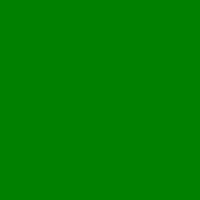

In [ ]:
from PIL import Image

im = Image.new("RGB", (200, 200), 'green')
im.save('green.gif')
im = Image.open('green.gif')
print(im.filename)
print(im.format)
print(im.mode)
print(im.size)
print(im.width)
print(im.height)
print(im.palette)
print(im.info)
im.show() #does not work in colab
im

In [ ]:
from PIL import Image, ImageDraw

names = ['tmp/img{:02d}.gif'.format(i) for i in range(20)]

# Create the individual frames as png images
im = Image.new("RGB", (200, 200), 'green')

pos = 0
for n in names:
    frame = im.copy()
    draw = ImageDraw.Draw(frame)
    draw.ellipse((pos, pos, 50+pos, 50+pos),
                 'red')
    frame.save(n)
    pos += 10


# Open all the frames
images = []

for n in names:
    frame = Image.open(n)
    images.append(frame)

# Save the frames as an animated GIF
images[0].save('anicircle.gif',
               save_all=True,
               append_images=images[1:],
               duration=100,
               loop=0)

# 4 Awesome Ways Of Loading ML Data In Google Colab

https://towardsdatascience.com/4-awesome-ways-of-loading-ml-data-in-google-colab-9a5264c61966

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/220px-TensorFlowLogo.svg.png

--2020-11-20 01:01:09--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/220px-TensorFlowLogo.svg.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23670 (23K) [image/png]
Saving to: ‘220px-TensorFlowLogo.svg.png’

220px-TensorFlowLog 100%[===================>]  23.12K  --.-KB/s    in 0.05s   

2020-11-20 01:01:09 (485 KB/s) - ‘220px-TensorFlowLogo.svg.png’ saved [23670/23670]



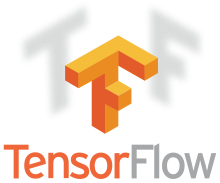

In [ ]:
from IPython.display import Image
Image('220px-TensorFlowLogo.svg.png')

# Animate graph diffusion with NetworkX

https://stackoverflow.com/questions/31815454/animate-graph-diffusion-with-networkx

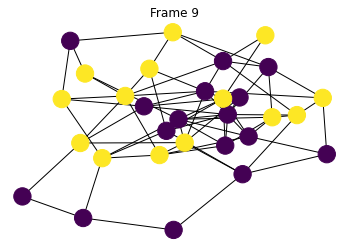

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def simple_update(num, n, layout, G, ax):
    ax.clear()

    # Draw the graph with random node colors
    random_colors = np.random.randint(2, size=n)
    nx.draw(G, pos=layout, node_color=random_colors, ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(num))


def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout
    n = 30 # Number of nodes
    m = 70 # Number of edges
    G = nx.gnm_random_graph(n, m)
    layout = nx.spring_layout(G)

    
    ani = animation.FuncAnimation(fig, simple_update, frames=10, fargs=(n, layout, G, ax))

    from IPython.display import HTML
    ani.save('animationdiffusion.mp4', writer='ffmpeg', fps=20);
    HTML(ani.to_jshtml())

    writer = PillowWriter(fps=25)
    ani.save('animationdiffusion.gif', writer=writer)

simple_animation()

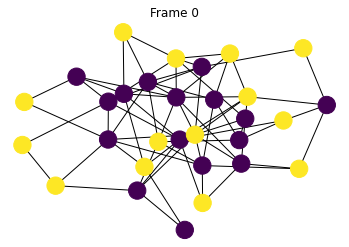

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


from JSAnimation import IPython_display

def simple_update(num, n, layout, G, ax):
    ax.clear()

    # Draw the graph with random node colors
    random_colors = np.random.randint(2, size=n)
    nx.draw(G, pos=layout, node_color=random_colors, ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(num))


# Build plot
fig, ax = plt.subplots(figsize=(6,4))

# Create a graph and layout
n = 30 # Number of nodes
m = 70 # Number of edges
G = nx.gnm_random_graph(n, m)
layout = nx.spring_layout(G)
    
ani = animation.FuncAnimation(fig, simple_update, frames=10, fargs=(n, layout, G, ax))

In [ ]:
from IPython.display import HTML
ani.save('animationdiffusion.mp4', writer='ffmpeg', fps=20);
HTML(ani.to_jshtml())

# Matplotlib Animation Tutorial

http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/



# A Javascript Viewer for Matplotlib Animations

https://jakevdp.github.io/blog/2013/05/19/a-javascript-viewer-for-matplotlib-animations/